In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\91623\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_csv("placement.csv")

In [4]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


Text(0, 0.5, 'Package')

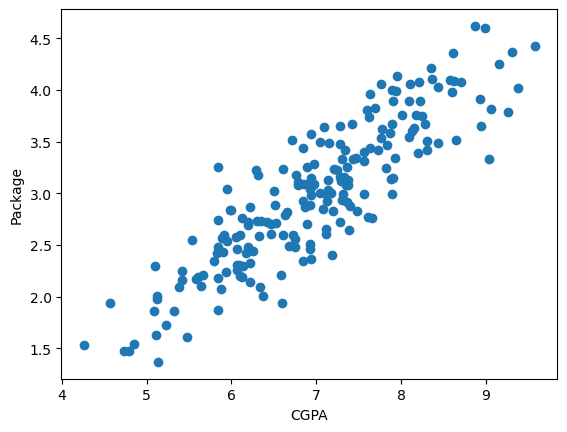

In [6]:
plt.scatter(data["cgpa"], data["package"])
plt.xlabel("CGPA")
plt.ylabel("Package")

In [7]:
x = data.iloc[:,0:1]
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [8]:
y = data.iloc[:,-1:]
y.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2 )

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 137 to 168
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [11]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 112 to 53
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   package  40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
m = model.coef_
m

array([[0.55795197]])

In [16]:
b = model.intercept_
b

array([-0.89611192])

In [17]:
# y = mx+b

y = m*6.89+b
y

array([[2.94817717]])

In [18]:
x_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [19]:
y_test.head()

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94


In [20]:
model.predict(x_test.iloc[1].values.reshape(-1,1))

C:\Users\91623\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.09324469]])

Text(0, 0.5, 'Package')

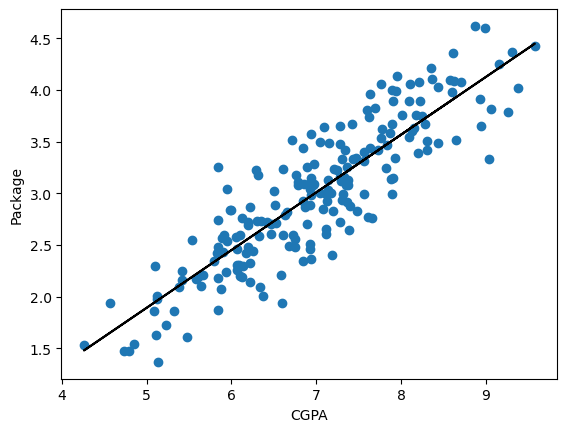

In [21]:
plt.scatter(data["cgpa"], data["package"])
plt.plot(x_train, model.predict(x_train), color = "black")
plt.xlabel("CGPA")
plt.ylabel("Package")

In [22]:
y_pred = model.predict(x_test)
y_pred[0]

array([3.89111601])

In [31]:
# check model accuracy

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
adj_r2_score =  1 - ((1-r2)*(40-1)/(40-1-1))


print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Mean Absloute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Adjusted R-squared Score: {adj_r2_score}")

Mean Squared Error: 0.12129235313495527
R-squared Score: 0.780730147510384
Mean Absloute Error: 0.2884710931878175
Root Mean Squared Error: 0.34827051717731616
Adjusted R-squared Score: 0.7749598882343415
